In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from collections import Counter

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
raw_data = pd.read_csv('weatherAUS.csv')

# EDA

Preview the data

In [ ]:
raw_data.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [ ]:
raw_data.shape, raw_data.columns

((145460, 23),
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
        'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainToday', 'RainTomorrow'],
       dtype='object'))

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Comments:

-Data contains mix of categorical and numerical values

-There is Object Dtype for categorical and float64 for numerical

-Also, in preview there are missing values with which we will deal later

Lets look at the percentage of missing values in each column

In [ ]:
((1 - raw_data.count() / raw_data.shape[0] ) * 100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

Sunshine, Evaporation, Cloud3pm, Cloud9am have high missing values percentage

Also, Very importantly our target feature RainTomorrow also has 2% null values, we can just to remove these rows since it is not very significant number

### Explore categorical values

In [ ]:
categorical = [feature for feature in raw_data.columns if raw_data[feature].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
raw_data[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

In [ ]:
raw_data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Above we see that WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow have significant number of missing values

Now lets look at the unique values of each categorical values:

In [ ]:
for feature in categorical:

    print(f'Feature {feature} : \n{raw_data[feature].unique()}\n {raw_data[feature].nunique()} unique labels\n')

Feature Date : 
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
 3436 unique labels

Feature Location : 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
 49 unique labels

Feature WindGustDir : 
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
 16 unique labels

Feature WindDir9am : 
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
 16 unique l

#### Summary of categorical features

There are 7 categorical features :

**Date**            3436 unique values

**Location**        49 unique values

**WindGustDir**     16 unique values

**WindDir9am**      16 unique values

**WindDir3pm**      16 unique values

**RainToday**       2 unique values

**RainTomorrow**    2 unique values

WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow categorical features have missing values.

## Explore Numerical Values

In [ ]:
numerical = [feature for feature in raw_data.columns if raw_data[feature].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
raw_data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [ ]:
# Number of missing values for numerical columns
raw_data[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
raw_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


After visual inspection, we see, there are outliers in Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm

Lets look close at these features by drawing boxplots

Text(0, 0.5, 'WindSpeed3pm')

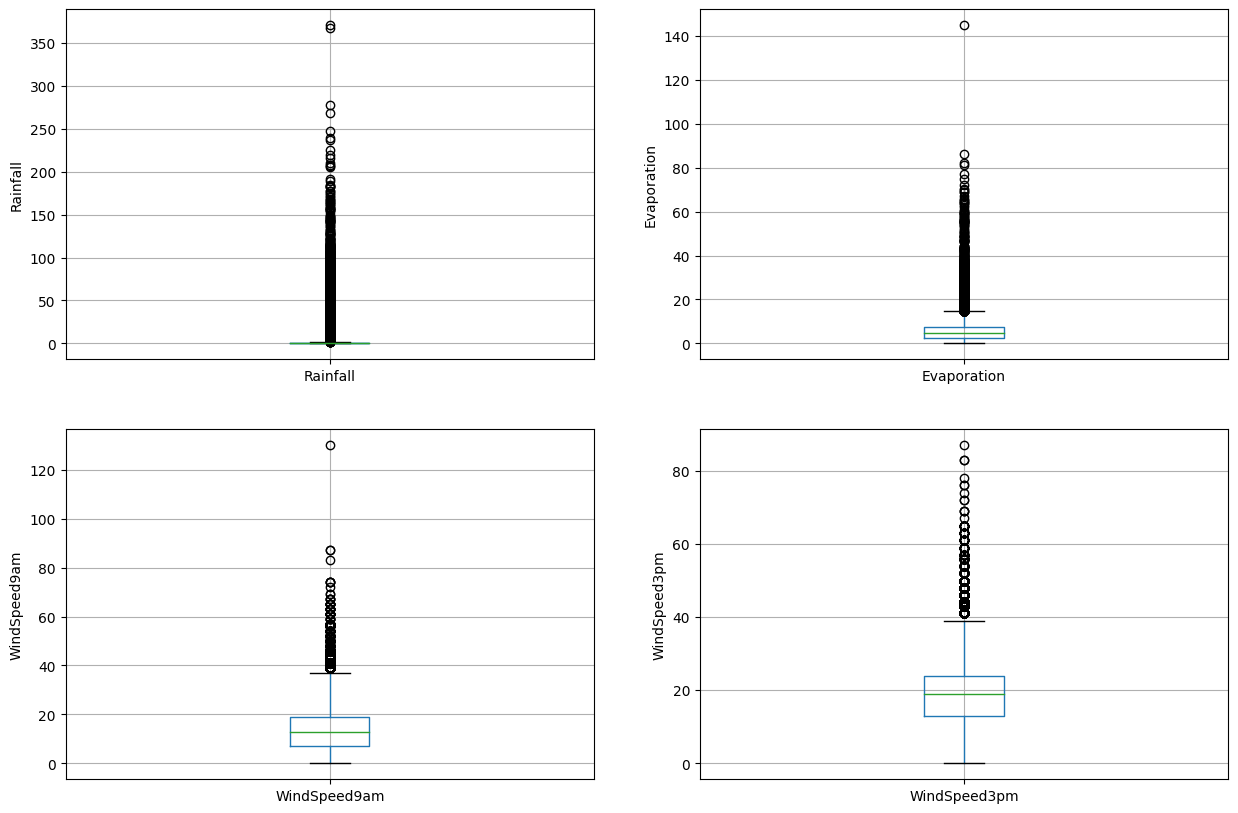

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = raw_data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = raw_data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = raw_data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = raw_data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The boxplots show the presence of outliers in those features

Now lets check the distribution of these features

Text(0.5, 0, 'WindSpeed3pm')

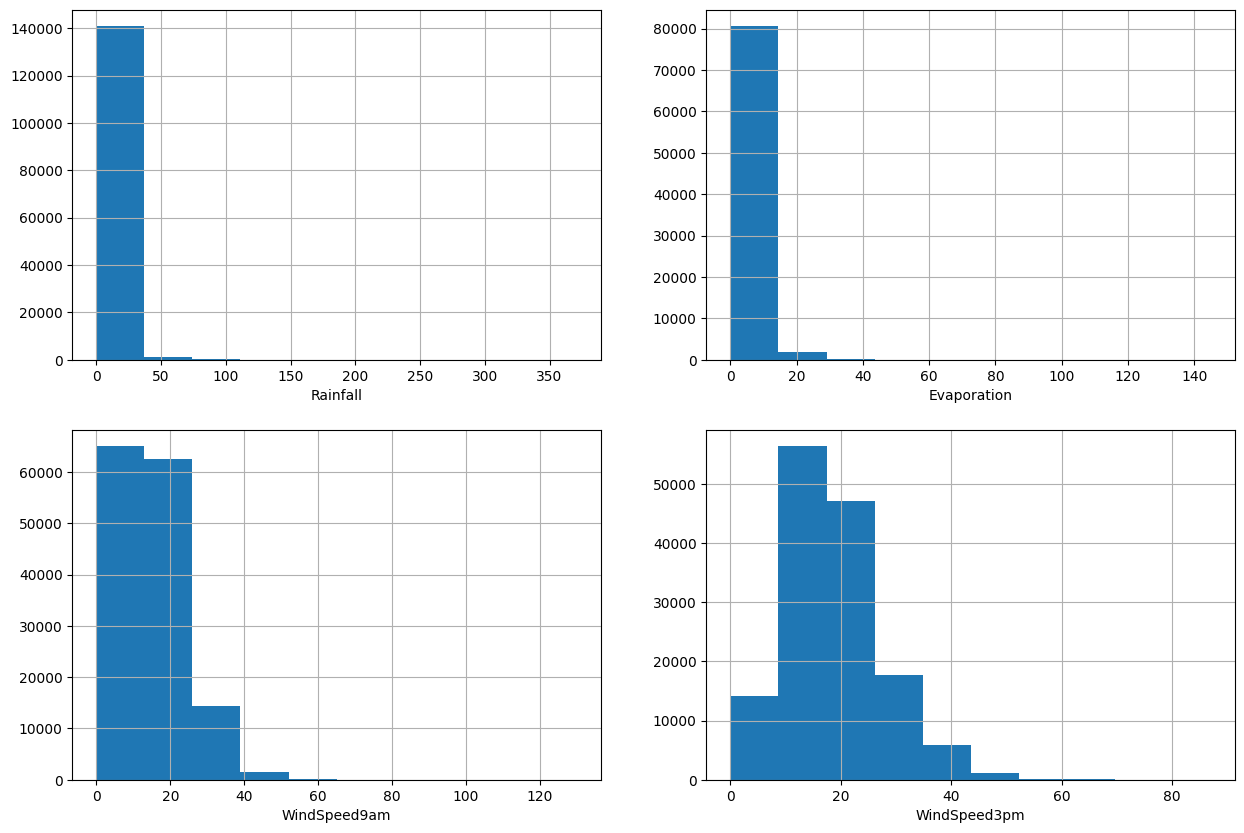

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = raw_data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')


plt.subplot(2, 2, 2)
fig = raw_data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')


plt.subplot(2, 2, 3)
fig = raw_data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = raw_data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')

##### Summary of numerical features

There are 16 numerical features.

All of the numerical features are of continuous type.

4 features (Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm) contain outliers

In data preparation we will find interquartile range to remove the outliers

## Multivariate Analysis

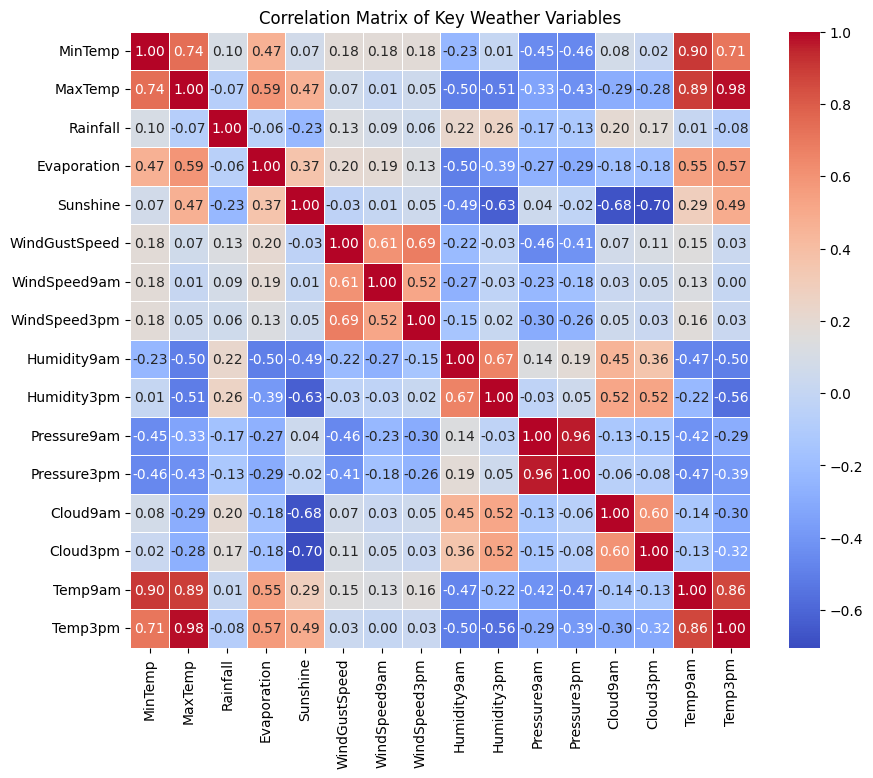

In [ ]:
correlation_matrix = raw_data[numerical].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Weather Variables')
plt.show()

**Temperature Correlations**: There is typically a high positive correlation between temperatures measured at different times of the day, such as minimum temperature (MinTemp), maximum temperature (MaxTemp), temperature at 9am (Temp9am), and temperature at 3pm (Temp3pm). This is expected as the temperatures throughout the day are usually related.

**Pressure Correlations**: Similarly, atmospheric pressure readings at different times (e.g., Pressure9am and Pressure3pm) are often highly correlated.

**Humidity and Temperature**: There is often a negative correlation between humidity and temperature variables. Higher temperatures can lead to lower relative humidity and vice versa.

**Wind Speeds**: Wind speed measurements at different times (e.g., WindSpeed9am and WindSpeed3pm) are likely to show a good degree of correlation, as wind patterns can be consistent over a single day.

**Rainfall and Humidity**: There can be a positive correlation between rainfall and humidity due to the presence of moisture in the air when it rains.

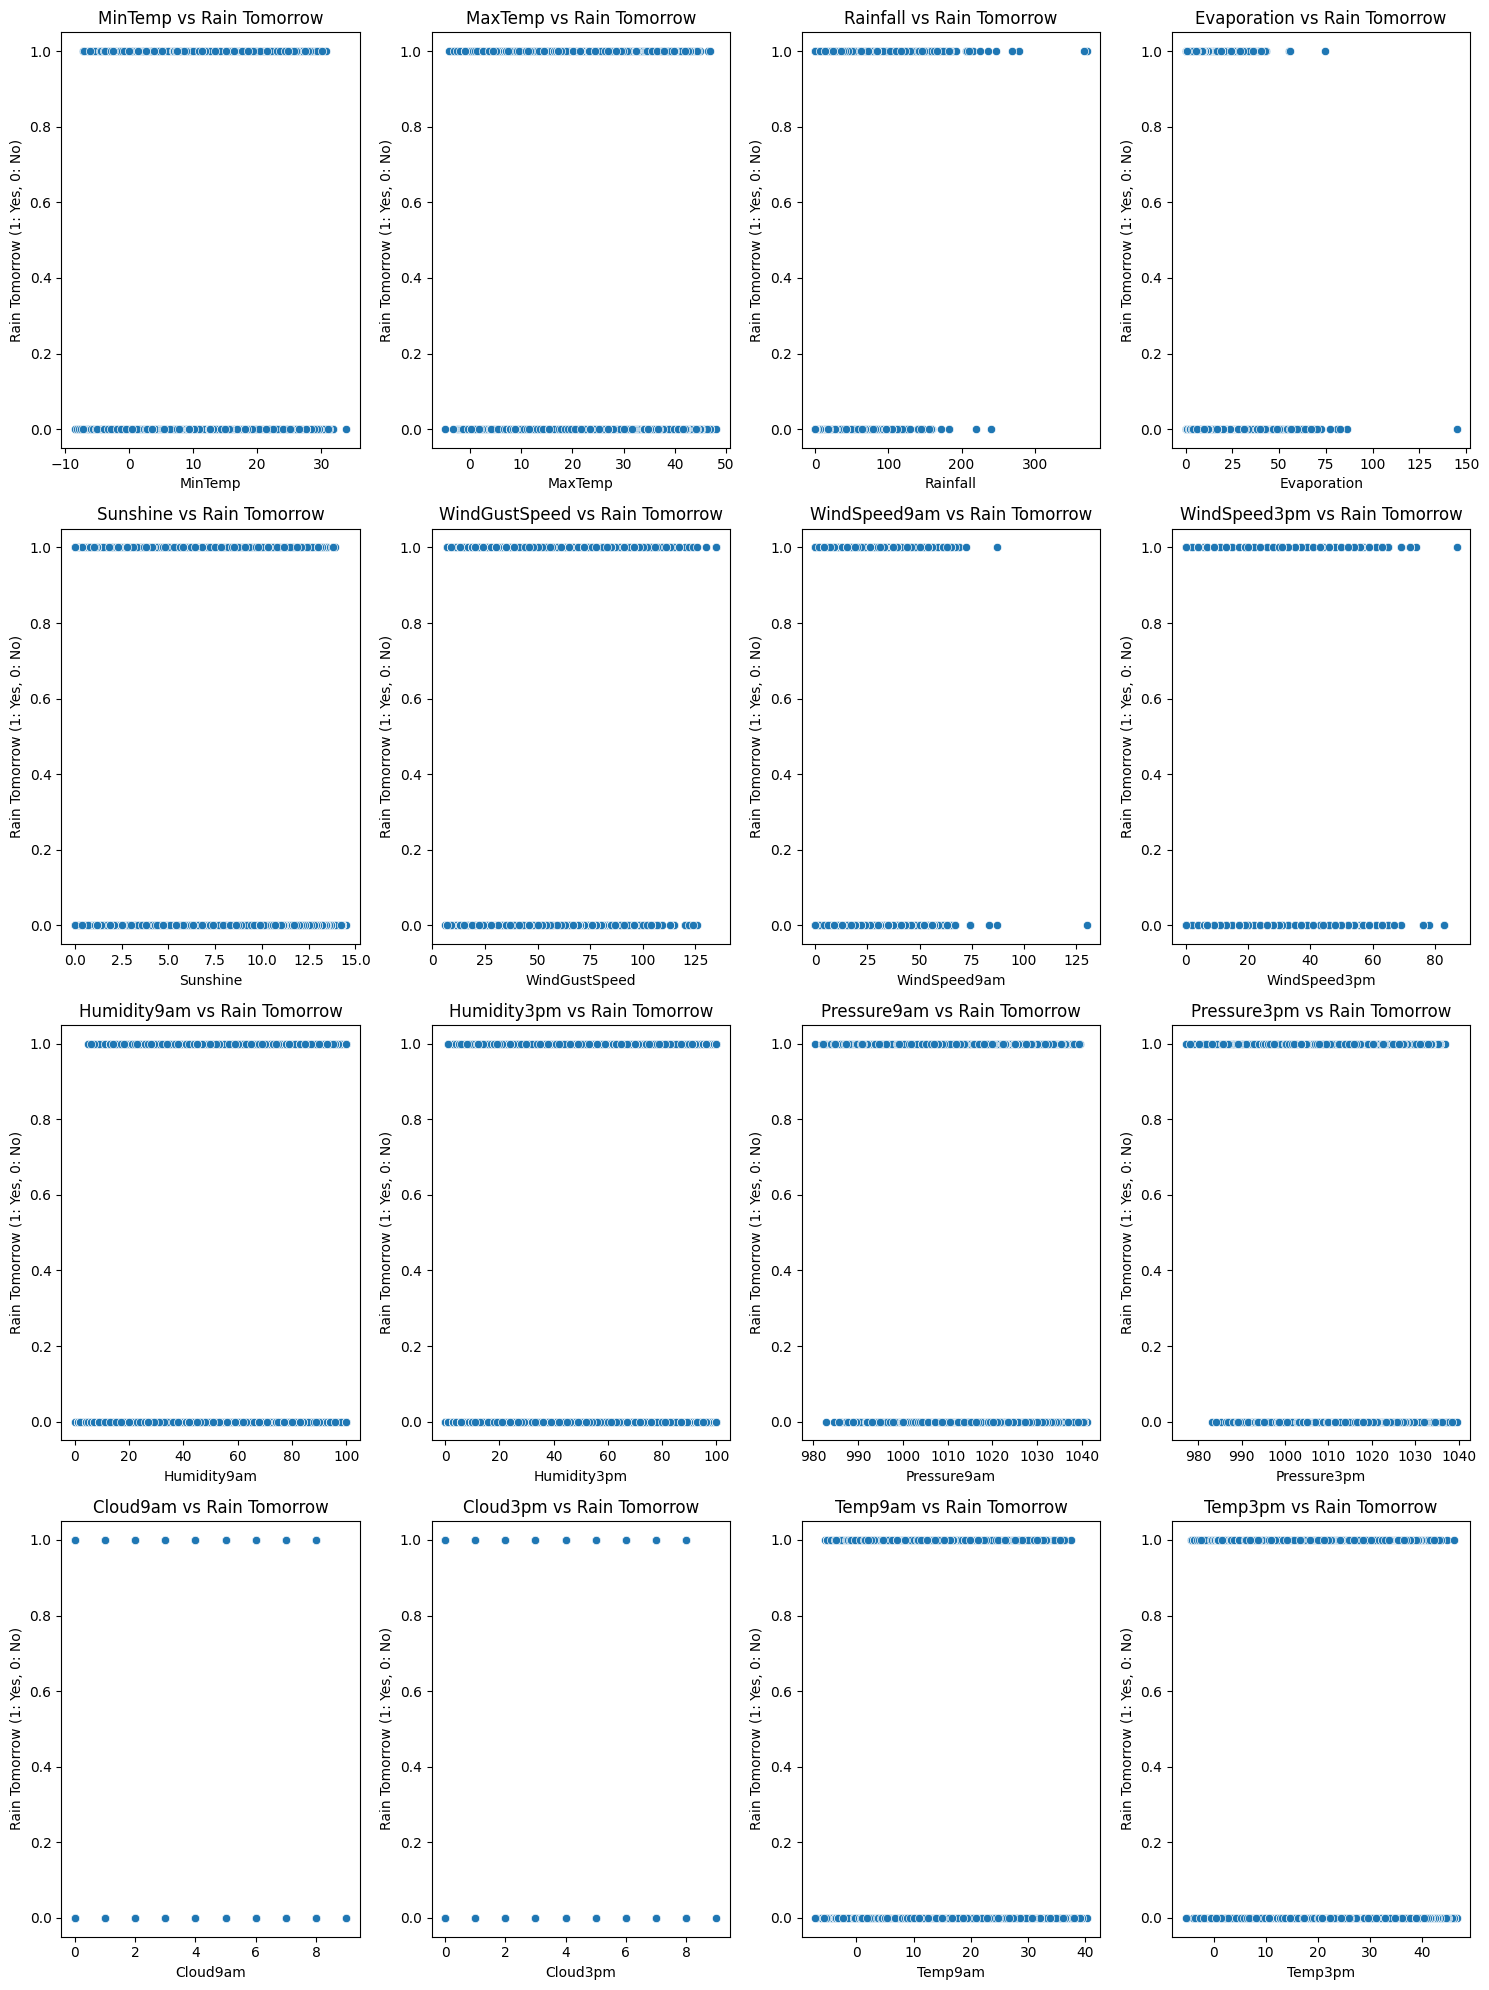

In [ ]:
raw_data_numeric = raw_data.copy()
raw_data_numeric['RainTomorrow'] = raw_data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate number of rows needed for subplots (4 subplots per row)
num_rows = len(numerical) // 4 + (len(numerical) % 4 > 0)

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, var in enumerate(numerical):
    sns.scatterplot(data=raw_data_numeric, x=var, y='RainTomorrow', ax=axes[i])
    axes[i].set_title(f'{var} vs Rain Tomorrow')
    axes[i].set_ylabel('Rain Tomorrow (1: Yes, 0: No)')

# Hide any empty subplot slots if the number of variables is not a multiple of 4
for j in range(len(numerical), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Most of these plots do not give much of an valuable information, however there are some cases we can look at

**Higher evaporation** levels, the less chance of having the rainfall the next day

**Higher Rainfall** levels today predict a little higher chance of Rain Tomorrow

# **Data Preparation**

**Date** is object type, we will convert it to datetime, then separate it to Day, Month, Year then drop Date column

In [ ]:
data = raw_data.copy()

In [ ]:
data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)

In [ ]:
data['Day'] = data.Date.dt.day
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

In [ ]:
data = data.drop(columns='Date')

In [ ]:
data.head().T

,0,1,2,3,4
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE
WindDir3pm,WNW,WSW,WSW,E,NW


Remove rows that have missing values of **RainTomorrow** values since it is our target value

In [ ]:
data.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
# Show how many missing values in RainTomorrow
data['RainTomorrow'].isnull().sum()

0

## Feature Engineering

### Numerical Features

In [ ]:
numerical = [col for col in data.columns if data[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [ ]:
# Show number of missing values
data[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Day                  0
Month                0
Year                 0
dtype: int64

#### Fill missing values

We need to fill the missing values. The most suitable method is to impute the median values because as previously found some features contain outliers.

In [ ]:
for feature in numerical:
    feature_median = data[feature].median()
    data[feature].fillna(feature_median, inplace=True)

In [ ]:
# Show number of missing values
data[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

We see that no missing values left, now let's deal with outliers of numerical features ( Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm )

#### Remove Outliers in numerical

In [ ]:
cols_with_outliers = ('Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm')

We need to find the interquartile range so we know what values(outliers) should replaced

In [ ]:
def find_iqr(data, feature):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_bound = data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = data[feature].quantile(0.75) + (IQR * 3)

    return lower_bound, upper_bound

When finding an interquartile range I will use raw_data because the data variable has been modified by adding the medians into columns which will affect the range

In [ ]:
for col in cols_with_outliers:
    lower_bound, upper_bound = find_iqr(raw_data, col)
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [ ]:
data[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,15.715084,6.402544,2012.758926
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


Now we can notice there are no outliers in the Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm  columns

### Categorical features

In [ ]:
categorical = [feature for feature in data.columns if data[feature].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
# Show missing values
data[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

#### Fill missing values

We will fill the missing values with the most frequent values of WindGustDir, WindDir9am, WindDir3pm, RainToday accordingly

In [ ]:
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)

In [ ]:
data[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Encode Categorical features using get_dummies

In [ ]:
data[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [ ]:
data['RainTomorrow'] = data['RainTomorrow'].replace({'Yes': 1, 'No': 0})

In [ ]:
data = pd.concat([data[numerical], pd.get_dummies(data[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]), data['RainTomorrow']], axis=1).reset_index(drop=True)

In [ ]:
data.shape

(142193, 119)

In [ ]:
data['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

## Scale Data

#### Split data into X, y sets

In [ ]:
X, y = data.drop(['RainTomorrow'], axis=1), data['RainTomorrow']

### Stratification of data

I will use stratification which ensures representative distribution of classes in both training and testing phases.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()

numerical_features = [col for col in X.columns if X[col].dtypes != 'O']

scaler.fit(X[numerical_features])

X[numerical_features] = scaler.transform(X[numerical_features])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487867,0.529780,0.211119,0.236047,0.554637,0.262947,0.254328,0.327024,0.688582,0.514957,...,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.778787,0.221213
std,0.150682,0.134397,0.370048,0.129063,0.191009,0.101865,0.160469,0.152661,0.189325,0.205322,...,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.415065,0.415065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.483491,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.596698,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handle Imbalanced Dataset

In [ ]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f'Values distribution BEFORE SMOTE : {Counter(y_train)}')
print(f'Values distribution AFTER SMOTE : {Counter(y_train_smote)}')

Values distribution BEFORE SMOTE : Counter({0: 88252, 1: 25502})
Values distribution AFTER SMOTE : Counter({0: 88252, 1: 88252})


# Metrics that will be used :
Accuracy: Measures the proportion of correctly predicted observations. It's useful when the target classes are well balanced.

Precision and Recall: Precision measures the proportion of positive identifications that were actually correct, while recall measures the proportion of actual positives that were identified correctly. These are important when dealing with imbalanced classes.

F1-Score: Harmonic mean of precision and recall. Useful when you need a balance between precision and recall.

AUC-ROC Curve: Area Under the Receiver Operating Characteristic Curve. A higher AUC indicates better model performance

# Modelling

## Logistic Regression

I will put class_weight to "balanced" which will adjust the importance given to each class during the learning process

### Function for Training and hypertuning of parameters

In [ ]:
def train_log_reg(X_train, y_train):
  log_reg = LogisticRegression(class_weight='balanced')

  # Define the hyperparameter grid
  param_grid = {
      'C': np.logspace(-4, 4, 20),
      'solver': ['liblinear', 'lbfgs', 'newton-cg'],
      'class_weight': [None, 'balanced'],
      'penalty': ['l1', 'l2']
  }
  grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)

  grid_search.fit(X_train, y_train)

  # Get the Best Model
  best_model = grid_search.best_estimator_

  return best_model, grid_search.best_params_

In [ ]:
# Train the model using GridSearchCV
best_log_reg, best_params_log_reg  = train_log_reg(X_train_smote, y_train_smote)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [ ]:
from joblib import dump

# Save the models to files
dump(best_log_reg, 'drive/MyDrive/Models/2_logistic_regression_model.joblib')

['drive/MyDrive/Models/2_logistic_regression_model.joblib']

In [ ]:
print(f'Best parametes for Logistic Regression: {best_params_log_reg}')

Best parametes for Logistic Regression: {'C': 0.03359818286283781, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


### Metrics Report

In [ ]:
# Evaluate the model on test set
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_pred_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86     22064
           1       0.53      0.77      0.63      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.74     28439
weighted avg       0.84      0.80      0.81     28439



### Feature Importance bar

In [ ]:
importance = best_log_reg.coef_[0]

# Get the indices of the features sorted by absolute importance
sorted_indices = np.argsort(np.abs(importance))[::-1]

# Print the features and their scores in descending order of importance
print("Top 10 Features ranked by importance:")
for idx in sorted_indices[:10]:
    print(f"Feature: {idx}, Score: {importance[idx]:.5f}")


Top 10 Features ranked by importance:
Feature: 11, Score: -1.50139
Feature: 9, Score: 1.32910
Feature: 10, Score: 1.07706
Feature: 5, Score: 0.76857
Feature: 1, Score: -0.45183
Feature: 2, Score: 0.35179
Feature: 4, Score: -0.33615
Feature: 13, Score: 0.32059
Feature: 15, Score: 0.28176
Feature: 0, Score: 0.17581


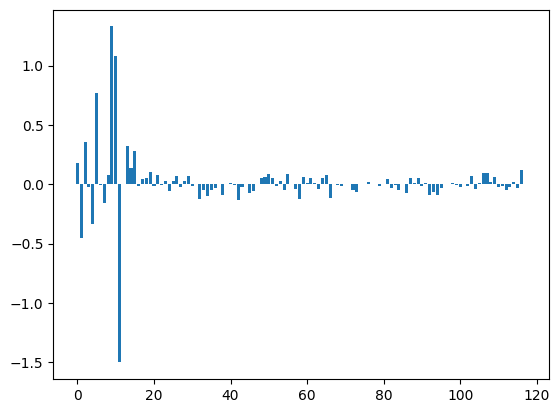

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Best Threshold Analysis

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.655906, F-Score=0.645


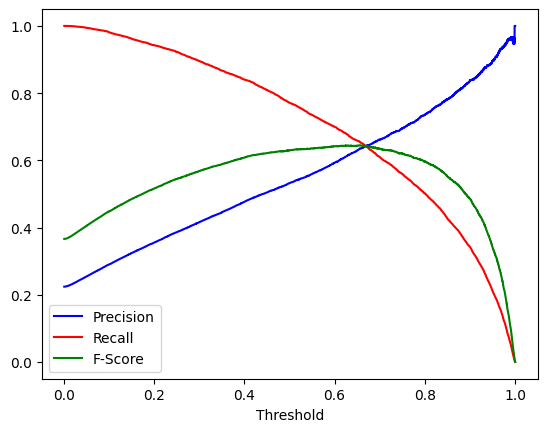

In [ ]:
# Plot Precision-Recall vs Threshold chart
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.plot(thresholds, fscore[:-1], 'g-', label='F-Score')
plt.xlabel('Threshold')
plt.legend()
plt.show()


## KNN Model

### Function to Train and find best K

In [ ]:
from sklearn.model_selection import cross_val_score

def train_eval_knn(X_train, y_train, X_test, y_test, k_values):
    cv_scores = {}

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores[k] = np.mean(scores)

    # Find the k value with the highest average score
    best_k = max(cv_scores, key=cv_scores.get)

    # Retrain the model with the best k value
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    return best_knn, best_k, cv_scores

Find best K among odd numbers up to 50

In [ ]:
 k_values = range(1, 50, 2)

In [ ]:
best_knn, best_k, cv_scores = train_eval_knn(X_train_smote, y_train_smote, X_test, y_test, k_values)

In [ ]:
from joblib import dump

# Save the models to files
dump(best_knn, 'drive/MyDrive/Models/3_knn_model.joblib')

['drive/MyDrive/Models/3_knn_model.joblib']

### Metrics Report and Best K graph

Best K Value: 1 with Accuracy: 0.8908353758646903


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.22      0.35     22098
           1       0.24      0.87      0.38      6341

    accuracy                           0.37     28439
   macro avg       0.55      0.55      0.37     28439
weighted avg       0.72      0.37      0.36     28439



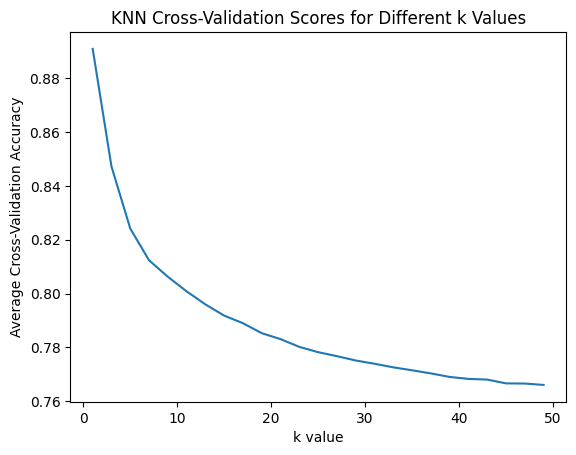

In [ ]:
print(f"Best K Value: {best_k} with Accuracy: {cv_scores[best_k]}")

y_pred_knn = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

plt.plot(cv_scores.keys(), cv_scores.values())
plt.xlabel('k value')
plt.ylabel('Average Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Scores for Different k Values')
plt.show()

## Naive Bayes Model

### Function to train and tune the hyperparameters

In [ ]:
def train_eval_nb(X_train, y_train, X_test, y_test, param_grid):
    nb = GaussianNB()

    grid_search = GridSearchCV(nb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_nb = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_nb, best_params

In [ ]:
# Define a range of 'var_smoothing' values for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
best_nb, best_params_nb = train_eval_nb(X_train, y_train, X_test, y_test, param_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from joblib import dump

# Save the models to files
dump(best_nb, 'drive/MyDrive/Models/2_nb_model.joblib')

['drive/MyDrive/Models/2_nb_model.joblib']

### Metrics Report and Best Parameters

In [ ]:
print(f'Best Parameters for Naive Bayes: {best_params_nb}')

Best Parameters for Naive Bayes: {'var_smoothing': 0.23101297000831597}


In [ ]:
y_pred_nb = best_nb.predict(X_test)
report = classification_report(y_test, y_pred_nb)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22064
           1       0.71      0.44      0.54      6375

    accuracy                           0.83     28439
   macro avg       0.78      0.69      0.72     28439
weighted avg       0.82      0.83      0.82     28439



## Support Vectore Machine

### Function for training and tuning hyperparameters

In [ ]:
def train_eval_linear_svm(X_train, y_train, X_test, y_test):
    params_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
    linear_svm = LinearSVC(dual=False, max_iter=10000)
    svm_grid_search = GridSearchCV(linear_svm, params_grid, cv=3, scoring='accuracy', n_jobs=-1)
    svm_grid_search.fit(X_train, y_train)

    best_linear_svm = svm_grid_search.best_estimator_

    return best_linear_svm, svm_grid_search.best_params_

In [ ]:
best_linear_svm, best_params = train_eval_linear_svm(X_train_smote, y_train_smote, X_test, y_test)

### Metrics Report and Best Parameters

In [ ]:
y_pred_svm = best_linear_svm.predict(X_test)

report = classification_report(y_test, y_pred_svm)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.50      0.66     22098
           1       0.35      0.92      0.50      6341

    accuracy                           0.60     28439
   macro avg       0.65      0.71      0.58     28439
weighted avg       0.82      0.60      0.63     28439



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [ ]:
print(f"Best Linear SVM Parameters: {best_params}")

Best Linear SVM Parameters: {'C': 0.1, 'penalty': 'l2'}


# ROC AUC Evaluation

In [ ]:
# Function to plot ROC Curve
def plot_roc_curve(y_test, y_probs, label):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.2f})')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


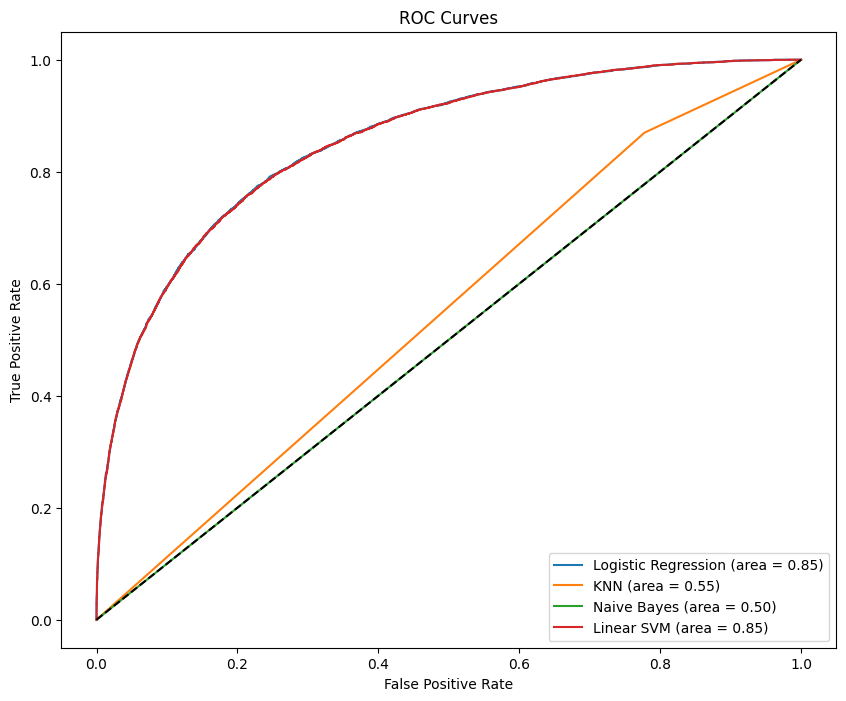

In [ ]:
plt.figure(figsize=(10, 8))

# Logistic Regression
y_probs_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_log_reg, 'Logistic Regression')

# KNN - KNN does not provide probabilities by default thas why we use the decision function
y_probs_knn = best_knn.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_knn, 'KNN')

# Naive Bayes
y_probs_nb = best_nb.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_nb, 'Naive Bayes')

# Linear SVM - Using Calibrated Classifier to get probabilities
calibrated_svm = CalibratedClassifierCV(best_linear_svm, method='sigmoid', cv='prefit')
calibrated_svm.fit(X_train_smote, y_train_smote)
y_probs_svm = calibrated_svm.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_probs_svm, 'Linear SVM')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


Based on the ROC curves:

**Logistic Regression** and Linear SVM excel with AUCs of 0.85, suggesting high accuracy in class prediction.

**KNN** has an AUC of 0.55, showing limited predictive power.

**Naive Bayes**, with an AUC of 0.50, performs no better than random chance.

**Logistic Regression and Linear SVM** are the top performers, while Naive Bayes is the least effective for the given data.

# Comparison

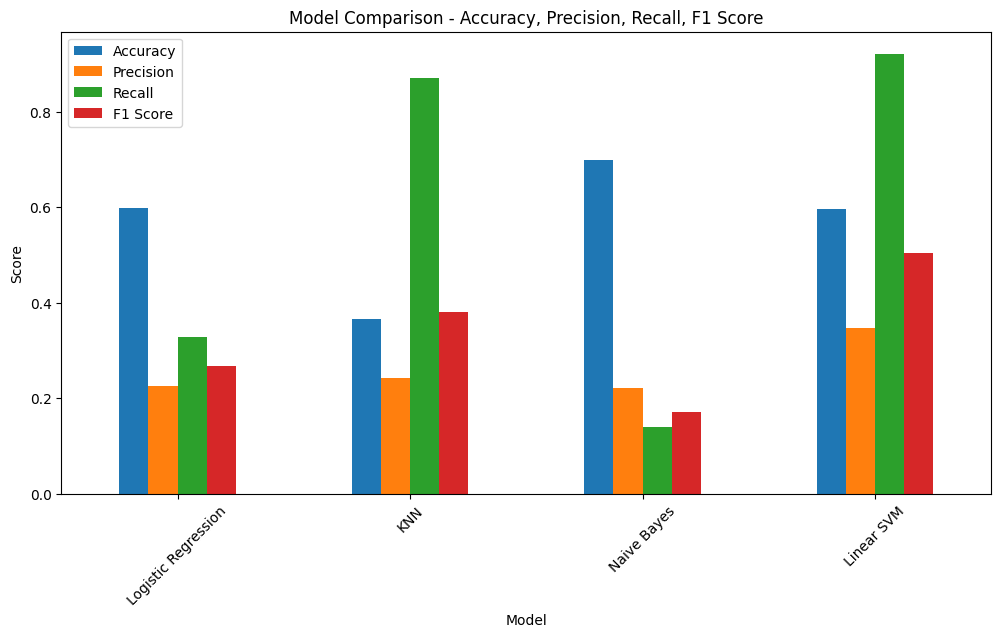

In [ ]:
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Linear SVM']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]
precisions = [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_nb), precision_score(y_test, y_pred_svm)]
recalls = [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_nb), recall_score(y_test, y_pred_svm)]
f1s = [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_svm)]

# Creating DataFrame for visualization
performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1s})

# Plotting the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison - Accuracy, Precision, Recall, F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

From the bar chart:

**Logistic Regression**: Shows moderate performance across all metrics, indicating a balanced model but not the best in any particular measure.

**KNN**: Exhibits low accuracy, precision, recall, and F1 score compared to the other models. It appears to be the least effective model for this task.

**Naive Bayes**: Has high recall but significantly lower precision, which suggests it is good at identifying positive instances but also misclassifies many negative instances as positive.

**Linear SVM**: Stands out with the highest accuracy and F1 score, suggesting a good balance between precision and recall. It's the top-performing model for this dataset.

Overall, Linear SVM is the best performer, particularly in terms of accuracy and F1 score, while KNN is the least effective. Naive Bayes, while having the highest recall, may not be practical due to a large number of false positives indicated by its low precision.

# Comparison 1 vs 1

**Logistic Regression vs KNN**:

Logistic Regression generally provides a more balanced performance across all metrics compared to KNN.
KNN may not be as precise as Logistic Regression, indicating a higher number of false positives.

**Logistic Regression vs Naive Bayes:**

Naive Bayes has a higher recall than Logistic Regression, which is beneficial in scenarios where it is critical to identify all positive instances.
Logistic Regression, however, maintains a better balance between precision and recall, making it more versatile for various scenarios.

**Logistic Regression vs Linear SVM:**

Linear SVM tends to have a higher recall but lower precision compared to Logistic Regression, which may suggest that it is better at identifying positive cases but at the cost of more false positives.
Logistic Regression remains the more balanced model overall, indicating its suitability for applications requiring an even-handed approach to false positives and negatives.

**KNN vs Naive Bayes:**

Naive Bayes significantly outperforms KNN in terms of recall, again emphasizing its ability to identify most positive instances.
KNN, while less effective in recall, does have better precision than Naive Bayes, indicating it has fewer false positives.

**KNN vs Linear SVM:**

Linear SVM and KNN both have their strengths, with SVM being more sensitive (higher recall) and KNN being more specific (higher precision).
The choice between these two would depend on whether the problem at hand requires minimizing false negatives (SVM) or false positives (KNN).

**Naive Bayes vs Linear SVM:**

Both models tend to prioritize recall over precision, though Linear SVM usually has a higher recall.
Naive Bayes can be more computationally efficient, making it suitable for large datasets or real-time processing.